In [1]:
!pip install  kaggle --upgrade
!mkdir -p ~/.kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


In [2]:
from google.colab import files
uploaded=files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -c building-type --force

  0% 0.00/2.21k [00:00<?, ?B/s]
100% 2.21k/2.21k [00:00<00:00, 4.93MB/s]
  0% 0.00/3.26k [00:00<?, ?B/s]
100% 3.26k/3.26k [00:00<00:00, 2.98MB/s]
  0% 0.00/3.35k [00:00<?, ?B/s]
100% 3.35k/3.35k [00:00<00:00, 3.35MB/s]
  0% 0.00/3.19k [00:00<?, ?B/s]
100% 3.19k/3.19k [00:00<00:00, 3.27MB/s]
  0% 0.00/1.94k [00:00<?, ?B/s]
100% 1.94k/1.94k [00:00<00:00, 1.95MB/s]
  0% 0.00/3.33k [00:00<?, ?B/s]
100% 3.33k/3.33k [00:00<00:00, 2.65MB/s]
  0% 0.00/2.90k [00:00<?, ?B/s]
100% 2.90k/2.90k [00:00<00:00, 2.79MB/s]
  0% 0.00/3.07k [00:00<?, ?B/s]
100% 3.07k/3.07k [00:00<00:00, 2.95MB/s]
  0% 0.00/3.32k [00:00<?, ?B/s]
100% 3.32k/3.32k [00:00<00:00, 3.35MB/s]
  0% 0.00/2.96k [00:00<?, ?B/s]
100% 2.96k/2.96k [00:00<00:00, 2.61MB/s]
  0% 0.00/3.16k [00:00<?, ?B/s]
100% 3.16k/3.16k [00:00<00:00, 2.88MB/s]
  0% 0.00/2.60k [00:00<?, ?B/s]
100% 2.60k/2.60k [00:00<00:00, 2.26MB/s]
  0% 0.00/3.29k [00:00<?, ?B/s]
100% 3.29k/3.29k [00:00<00:00, 2.83MB/s]
  0% 0.00/3.26k [00:00<?, ?B/s]
100% 3.26k/3.26k [0

In [5]:
ls

194978478-155898319.jpg  296281732-952898331.jpg  298445419-953368036.jpg
19619201-154947367.jpg   296314727-952533045.jpg  29898689-955158249.jpg
196212871-155985709.jpg  296332958-955071569.jpg  298999134-955030999.jpg
20685612-156434585.jpg   296346354-955227318.jpg  299028414-954976911.jpg
212812845-157835200.jpg  296353547-954053268.jpg  299069281-954040586.jpg
21291022-157668205.jpg   296436404-952664032.jpg  31080344-88011793.jpg
213155469-158038971.jpg  296452156-952665256.jpg  313130335-855972819.jpg
21339368-157907732.jpg   296459077-952769053.jpg  324313662-93748885.jpg
21362628-157965469.jpg   296464412-955405249.jpg  324624569-936882747.jpg
214516358-157740088.jpg  296482991-952524885.jpg  325087985-887820661.jpg
215745556-158109988.jpg  296506794-954687295.jpg  325668325-855342903.jpg
218740049-159444702.jpg  29652861-952487130.jpg   326419364-836821071.jpg
222259159-159485936.jpg  296584588-952882614.jpg  33354189-845340552.jpg
254539482-804422798.jpg  296645848-95258445

In [6]:
!unzip \*.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [8]:
import zipfile
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
zip_ref = zipfile.ZipFile("/content/drive/My Drive/building-type.zip", 'r')
zip_ref.extractall()
zip_ref.close()

In [63]:
import torch
import numpy as np

train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [64]:
!pip install nonechucks
from torchvision import datasets, transforms
import torch
import numpy as np
import nonechucks as nc
from torch.utils.data.sampler import SubsetRandomSampler

In [0]:
data_dir = 'staticmap/'

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

transform = transforms.Compose([transforms.Resize(225),
                                transforms.CenterCrop(224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

train_data = datasets.ImageFolder(data_dir + 'train', transform=transform)
train_data = nc.SafeDataset(train_data)

num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)

test_data = datasets.ImageFolder(data_dir + 'test', transform=transform)
test_data= nc.SafeDataset(test_data)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,shuffle=True,
    num_workers=num_workers)


classes=['industrial','residential']


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5  
    plt.imshow(np.transpose(img, (1, 2, 0))) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

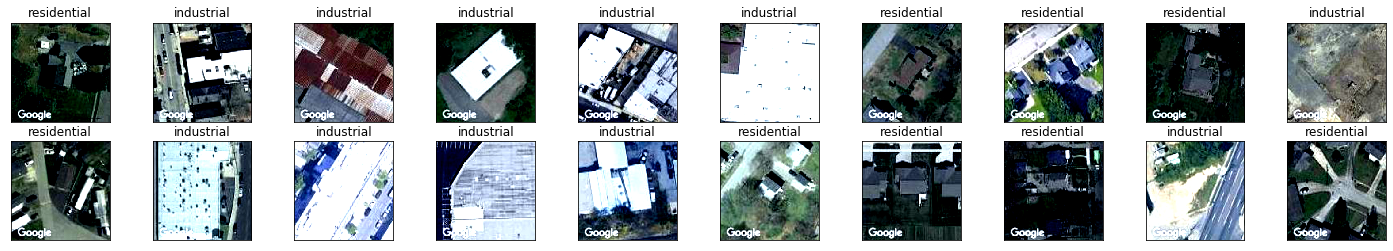

In [67]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() 

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [71]:
import torch
import torchvision.models as models

# define Resnext model
RSNET = models.resnext50_32x4d(pretrained=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

RSNET = RSNET.cuda().to(device)
print('Use ' + device)

Use cuda


In [0]:
import torch.optim as optim
import torch.nn as nn

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(RSNET.parameters(), lr=0.001)

In [73]:

n_epochs = 500

valid_loss_min = np.Inf 

for epoch in range(n_epochs):

    train_loss = 0.0
    valid_loss = 0.0
    
    # train the model 
    RSNET.train()
    for images, labels in train_loader:
        if train_on_gpu:
            images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()
        output = RSNET(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()*images.size(0)
            
    # validate the model 
    RSNET.eval()
    for images, labels in valid_loader:
        if train_on_gpu:
            images, labels = images.cuda(), labels.cuda()
        output = RSNET(images)
        loss = criterion(output, labels) 
        valid_loss += loss.item()*images.size(0)
  
    train_loss = train_loss/len(train_loader)
    valid_loss = valid_loss/len(valid_loader)
         
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        valid_loss_min = valid_loss
        torch.save(RSNET.state_dict(), 'build_type.pt')

Epoch: 0 	Training Loss: 47.930112 	Validation Loss: 12.022556
Validation loss decreased (inf --> 12.022556).  Saving model ...
Epoch: 1 	Training Loss: 6.029857 	Validation Loss: 7.838957
Validation loss decreased (12.022556 --> 7.838957).  Saving model ...
Epoch: 2 	Training Loss: 3.607106 	Validation Loss: 6.774136
Validation loss decreased (7.838957 --> 6.774136).  Saving model ...
Epoch: 3 	Training Loss: 2.206133 	Validation Loss: 6.165692
Validation loss decreased (6.774136 --> 6.165692).  Saving model ...
Epoch: 4 	Training Loss: 1.421137 	Validation Loss: 5.946063
Validation loss decreased (6.165692 --> 5.946063).  Saving model ...
Epoch: 5 	Training Loss: 1.241478 	Validation Loss: 6.137768
Epoch: 6 	Training Loss: 0.997868 	Validation Loss: 5.813484
Validation loss decreased (5.946063 --> 5.813484).  Saving model ...
Epoch: 7 	Training Loss: 0.721204 	Validation Loss: 5.900205
Epoch: 8 	Training Loss: 0.695502 	Validation Loss: 5.960387
Epoch: 9 	Training Loss: 0.561745 	Val

KeyboardInterrupt: ignored

In [78]:
RSNET.load_state_dict(torch.load('build_type.pt'))

test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))

RSNET.eval()
for images, labels in test_loader:
    if train_on_gpu:
        images, labels = images.cuda(), labels.cuda()
    output = RSNET(images)
    loss = criterion(output, labels)
    test_loss += loss.item()*images.size(0)
    _, pred = torch.max(output, 1)    
    correct_tensor = pred.eq(labels.data.view_as(pred))
    correct = np.squeeze(correct_tensor.cpu().numpy())
    for i in range(2):
        label = labels.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(2):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.233035

Test Accuracy of industrial: 100% (14/14)
Test Accuracy of residential: 93% (15/16)

Test Accuracy (Overall): 96% (29/30)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

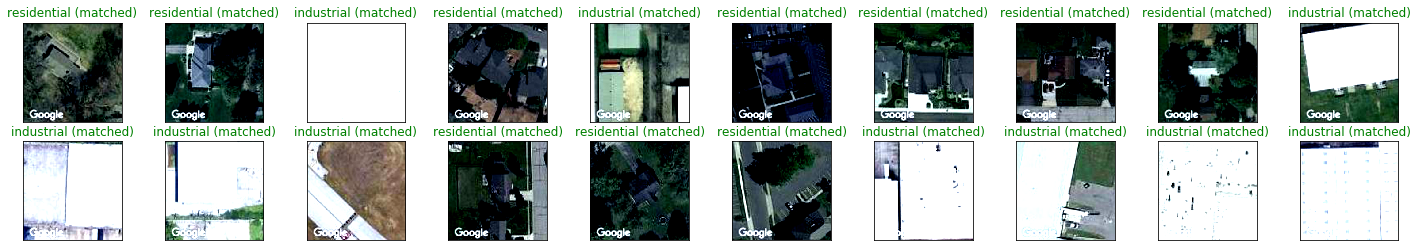

In [79]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

if train_on_gpu:
    images = images.cuda()

output = RSNET(images)
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images.cpu()[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]],"matched" if classes[labels[idx]]==classes[preds[idx]] else "unmatched"),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))